<h1 align="center">Obtención del coeficiente de amortiguamiento</h1>
<div align="right">David A. Miranda, Ph.D<br>2020</div>

Los datos obtenidos en el experimento se pueden modelar con la siguiente ecuación:
$$\theta(t) = \theta_0 e^{-\beta ( t - t_0 )} sin[\omega (t - t_0)]$$
Donde $\theta_0$ es la amplitud de la oscilación cuando inicia el movimiento; $t_0$, el tiempo en que inicia el movimiento; $\beta$, el coeficiente de atenuación y $\omega = 2\pi / T $, la frecuencia angular, la cual está asociada con el periodo $T$ de la onda no amortiguada.

# 1. Importa las librerías a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Carga los datos obtenidos en el laboratorio

In [2]:
time = [
 4.20,
 5.00,
 5.84,
 6.70,
 7.50,
 8.30,
 9.10,
 9.90,
10.80,
] # Segundo
angle = [
 10,
-10,
  9,
 -8,
  8,
 -6,
  6,
 -6,
  5,
] # Grados

# 3. Método 1: obtención del coeficiente de atenuación a partir de dos puntos

Dado que la amplitud de la oscilación $A$ disminuye en el tiempo siguiendo una función exponencial, tal que,

$$A(t) = \theta_0 e^{-\beta (t-t_0)}$$

Entonces, se puede obtener $\beta$ a partir de los datos para dos tiempos conocidos, $t_0$ y $t_1$,

$$\frac{A(t_1)}{A(t_0)} = e^{-\beta (t_1-t_0)}$$

Al despejar $\beta$ se obtiene,

$$\beta = \frac{-1}{t_1-t_0} ln\left[\frac{A(t_1)}{A(t_0)}\right]$$

Note que este es el método más simple, no el más preciso.

Ver descripción en este [video](https://youtu.be/M1_4gJecyjc).

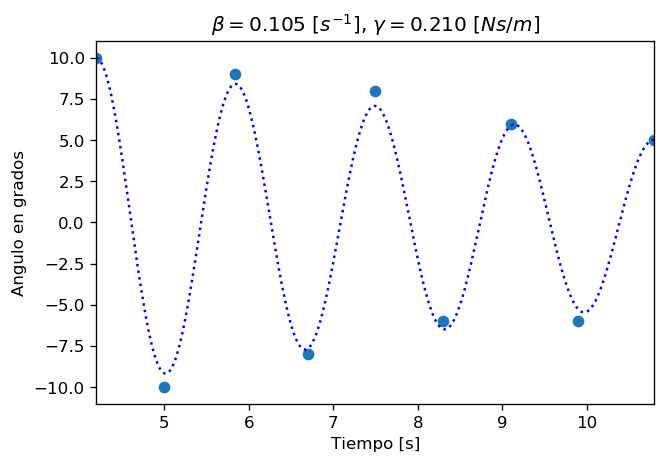

In [3]:
T = 1.65 # s
β = 0.1050223001 # 1/s
m = 1 # kg
θo = max(np.abs(angle)) # Grados
t = np.linspace(min(time), max(time), 1000)
t0 = min(t)
θ_model = θo*np.exp(-β*(t-t0))*np.cos(2*np.pi*(t - t0)/T)

plt.figure(dpi=120)
plt.plot(time, angle, 'o')
plt.plot(t, θ_model, 'b:')
plt.xlabel('Tiempo [s]')
plt.ylabel('Angulo en grados')
_ = plt.title(r'$\beta = %0.3f$ $[s^{-1}]$, $\gamma = %0.3f$ $[N s/m]$' % (β, 2*m*β))
_ = plt.axis([t0, max(time), 1.1*min(angle), 1.1*max(angle)])

# 4. Método 2: obtención del coeficiente de atenuación por linealización de los datos

En este segundo método, mucho más preciso que el anterior, se linealiza la ecuación que describe el cambio en la amplitud $A(t)$ de la oscilación.  Para ello se realiza el siguiente cambio de variable:

$$y = - ln\left|\frac{\theta(t)}{\theta_0}\right|$$

$$x = t - t_0$$

A continuación, se grafica $y$ en función de $x$, lo cual tendrá una tendencia lineal dado por,

$$y = \beta x$$

A partir de estos datos se obtienen la pendiente, que será el coeficiente de atenuación $\beta$. 

Ver descripción en este [video](https://youtu.be/Khrhk-4LTJ0).

In [4]:
T = 2*np.mean(np.diff(time)) # s
t0 = min(t)
θo = max(np.abs(angle)) # Grados
x = time - t0
y = - np.log( np.abs(angle) / θo)
## Filtrado de datos para dejar solo datos válidos ##
k_finite = np.isfinite(x) & np.isfinite(y) # Encuentra los valores finitos (diferntes de NaN e Inf)
x = x[k_finite]
y = y[k_finite]
t_fit = np.array(time)[k_finite] - t0
#####################################################
p = np.polyfit(x, y, 1)
β = p[0] # 1/s
p[1] = 0 # garantiza el cruce por cero
m = 1 # kg
θo = max(angle) # Grados

In [5]:
t = np.linspace(min(time), max(time), 1000)
θ = θo*np.exp(-β*(t-t0))*np.cos(2*np.pi*(t - t0)/T)

correlation_matrix = np.corrcoef(y, np.polyval(p, t_fit))
R = correlation_matrix[0, 1]**2

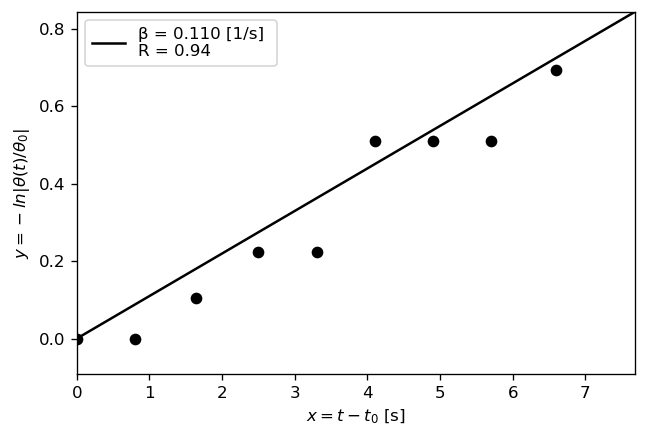

In [6]:
label = 'β = %0.3f [1/s] \nR = %0.2f' % (β, R) 

x_model2 = np.linspace(0.8*min(time), 1.1*max(time), 10) - t0
y_model2 = np.polyval(p, x_model2)

plt.figure(dpi=120)
plt.plot(x, y, 'ok')
plt.plot(x_model2, y_model2, 'k', label=label)
plt.xlabel(r'$x = t - t_0$ [s]')
_ = plt.ylabel(r'$y = - ln\left|\theta(t) / \theta_0\right| $')
plt.legend()
try:
    _ = plt.axis([0, max(x_model2), min(y_model2), max(y_model2)])
except:
    pass

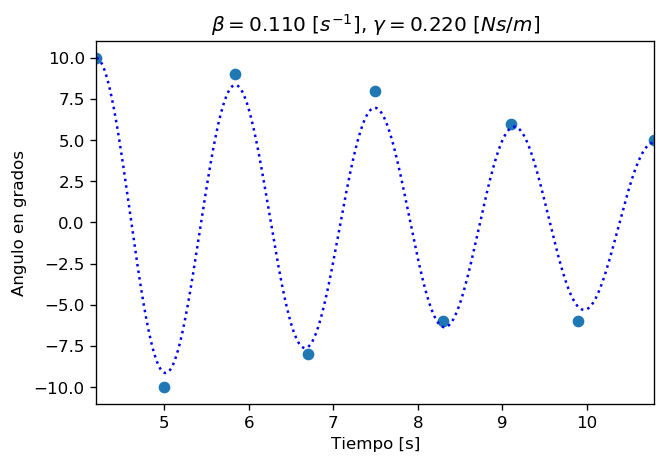

In [7]:
plt.figure(dpi=120)
plt.plot(time, angle, 'o')
plt.plot(t, θ, 'b:')
plt.xlabel('Tiempo [s]')
plt.ylabel('Angulo en grados')
_ = plt.title(r'$\beta = %0.3f$ $[s^{-1}]$, $\gamma = %0.3f$ $[N s/m]$' % (β, 2*m*β))
_ = plt.axis([t0, max(time), 1.1*min(angle), 1.1*max(angle)])

End!